# Zheng et al (2022) Dataset Tutorial 

*Author: Dhruv Mehrotra*


This notebook demonstrates how we use Pynapple on various publicly available datasets in systems neuroscience to streamline analysis. In this notebook, we will examine the dataset from Zheng et al (2022), which was used to generate Figure 4c in the publication. 

The NWB file for the example used here is provided in this repository. The entire dataset can be downloaded  <a href="https://dandiarchive.org/dandiset/000207/0.220216.0323" target="_blank">here</a>. 

First, import the necessary libraries: 

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import os
import pandas as pd 
import pynapple as nap 
import pynwb


The first step is to load the data from the Neurodata Without Borders (NWB) file. This is done as follows:

In [3]:
data_directory = '/home/dhruv/Code/Projects/Steinmetz/000207/sub-4' #Path to your data
nwbfilename = [f for f in os.listdir(data_directory) if "nwb" in f][0] #Find the NWB file in the directory
nwbfilepath = os.path.join(data_directory, nwbfilename) #Path to the NWB file
io = pynwb.NWBHDF5IO(nwbfilepath, "r") #Create I/O object for NWB files
nwbfile = io.read() #Read the NWB file

Now let's load the units:

In [4]:
units = nwbfile.units.to_dataframe() #Make a DataFrame of units

#What does this look like?
units

,spike_times,electrodes
id,,
0,"[0.03942225, 0.224933, 0.57630925, 0.75585675,...",x y z imp loca...
1,"[0.11060299999999999, 0.159082, 0.170435249999...",x y z imp loca...
2,"[0.0101695, 0.34445224999999996, 0.35126874999...",x y z imp loca...
3,"[0.6591977499999999, 1.433779, 1.4394622499999...",x y z imp loca...
4,"[0.083177, 0.36912849999999997, 2.747743, 3.76...",x y z imp location...
5,"[1.9118342499999998, 2.19203725, 6.923858, 7.7...",x y z imp location...
6,"[2.0798345, 3.18959125, 3.471756, 3.62455375, ...",x y z imp location...
7,"[0.099465, 0.1986445, 0.21868374999999998, 0.3...",x y z imp location...
8,"[0.30819325, 0.46718675, 1.6140295, 3.50645425...",x y z imp location...


This DataFrame has 3 columns: the unit ID, spike timings, and the electrode locations. Let's extract the spike timings and put them in a Pynapple TsGroup.

In [5]:
#Create a dictionary of spike timings
spike_times = {
            n: nap.Ts(t = units.loc[n, "spike_times"], time_units = "s")
            for n in units.index
        }

spikes = nap.TsGroup(spike_times)

#What does this look like? 
spikes


  Index    Freq. (Hz)
-------  ------------
      0          7
      1          7.24
      2          6.09
      3          6.92
      4          0.4
      5          0.46
      6          1.81
      7          4.79
      8          1.31
      9          0.62
     10          1.51
     11          0.77
     12          1.46
     13          0.4
     14          6.27
     15          1.15
     16          2.15
     17          0.63
     18          2.88
     19          0.35
     20          1.75
     21          0.58
     22          2.13
     23          1.51
     24          0.27
     25          7.35
     26          0.37
     27          1.89
     28          1.13
     29          0.6
     30          0.18
     31          2.33
     32          0.31
     33          0.69
     34          0.66

The spike times TsGroup has 2 columns: The unit ID, and the firing rate of the units in Hz.

Let's also extract the electrode locations:

In [6]:
electrode_location = np.array(nwbfile.units.electrodes.get('location'))

#What does this look like? 
electrode_location

array([b'hippocampus_right', b'hippocampus_right', b'hippocampus_right',
       b'hippocampus_right', b'hippocampus_right', b'amygdala_right',
       b'amygdala_right', b'amygdala_right', b'amygdala_right',
       b'amygdala_right', b'hippocampus_right', b'hippocampus_right',
       b'hippocampus_right', b'hippocampus_right', b'hippocampus_right',
       b'hippocampus_right', b'hippocampus_right', b'hippocampus_right',
       b'hippocampus_right'], dtype='|S17')

Next, let's get the table of all stimulus times, as shown below:

In [7]:
encoding_table = nwbfile.intervals.get('encoding_table') #Get the encoding table for all stimuli

#What does this look like?
encoding_table

encoding_table pynwb.epoch.TimeIntervals at 0x139986732956448
Fields:
  colnames: ['start_time' 'stop_time' 'fixcross_time' 'ExperimentID' 'boundary1_time'
 'boundary2_time' 'boundary3_time' 'stimCategory' 'Clip_name']
  columns: (
    start_time <class 'hdmf.common.table.VectorData'>,
    stop_time <class 'hdmf.common.table.VectorData'>,
    fixcross_time <class 'hdmf.common.table.VectorData'>,
    ExperimentID <class 'hdmf.common.table.VectorData'>,
    boundary1_time <class 'hdmf.common.table.VectorData'>,
    boundary2_time <class 'hdmf.common.table.VectorData'>,
    boundary3_time <class 'hdmf.common.table.VectorData'>,
    stimCategory <class 'hdmf.common.table.VectorData'>,
    Clip_name <class 'hdmf.common.table.VectorData'>
  )
  description: intervals for the encoding task
  id: id <class 'hdmf.common.table.ElementIdentifiers'>

This table has, among other things, the scene boundary times for which we will plot the peri-event time histogram (PETH).

There are 3 types of scene boundaries in this data. For the purposes of demonstration, we will use only the "No boundary" (NB) and the "Hard boundary" (HB conditions). The encoding table has a *stimCategory* field, which tells us the type of boundary corresponding to a given trial. 

In [8]:
stimCategory = np.array(encoding_table.stimCategory.data) #Get the scene boundary type for all trials

#What does this look like? 
stimCategory

array([0, 1, 2, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0,
       0, 2, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 2, 1, 0, 2, 2, 2, 0, 1, 0, 1, 1, 2, 2, 0, 2, 2, 2,
       1, 1, 2, 1, 0, 2, 2, 1, 0, 1, 2, 0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 1], dtype=uint8)

Trials marked 0 correspond to NB, while trials marked 2 correspond to HB. Let's extract the trial numbers for NB and HB trials, as shown below:

In [9]:
indxNB = np.where(stimCategory == 0) #NB trial indices
indxHB = np.where(stimCategory == 2) #HB trial indices

The encoding table also has 3 types of boundary times. For the purposes of our demonstration, we will focus on boundary1 times, and extract them as shown below:

In [10]:
boundary1_time = np.array(encoding_table.boundary1_time.data) #Get timings of Boundary1

#What does this look like? 
boundary1_time

array([  5.06846275,  12.88060075,  23.071072  ,  32.1604755 ,
        41.470909  ,  49.5747065 ,  56.07442325,  72.803867  ,
        82.1299925 ,  92.77667275,  99.9925845 , 109.0787315 ,
       118.0778575 , 133.12435825, 140.94827125, 147.8236585 ,
       160.726736  , 170.441769  , 183.29262575, 191.11327175,
       199.63382425, 208.5142425 , 217.6186295 , 232.62687825,
       241.7270365 , 250.58327775, 259.5545145 , 268.6661045 ,
       278.026902  , 287.04517875, 301.2426685 , 310.21093375,
       319.1822215 , 328.13037175, 337.16751875, 363.737004  ,
       372.785663  , 381.86749625, 391.2704085 , 400.5077995 ,
       407.28660475, 416.0272855 , 431.792285  , 441.75272875,
       448.88401175, 456.97766275, 463.88864475, 472.13035175,
       490.53584775, 499.7064625 , 507.6917495 , 518.78793775,
       528.140675  , 537.1412335 , 552.5116415 , 562.4287995 ,
       569.44012625, 580.99649325, 591.974217  , 597.74463025,
       608.3638655 , 624.44389125, 633.4175285 , 642.39

This contains the timings of all boundaries in this block of trials. Note that we also have the type of boundary for each trial. Let's store the NB and HB boundary timings in separate variables, as Pynapple Ts objects:

In [11]:
NB = nap.Ts(boundary1_time[indxNB]) #NB timings
HB = nap.Ts(boundary1_time[indxHB]) #HB timings

io.close() #Close the I/O object

Now the analysis can truly begin! 

***

## Step-by-step tutorial

### Peri-Event Time Histogram (PETH)

A PETH is a plot where we align a variable of interest (for example, spikes) to an external event (in this case, to boundary times). This visualization helps us infer relationships between the two.

For our demonstration, we will align the spikes of the first unit, which is located in the hippocampus, to the times of NB and HB. You can do a quick check to verify that the first unit is indeed located in the hippocampus, we leave it to you.

With Pynapple, PETHs can be computed with a single line of code!

/home/dhruv/pynapple/pynapple/core/time_series.py:154: RuntimeWarning: invalid value encountered in double_scalars
  self.rate = len(t) / self.time_support.tot_length("s")
/home/dhruv/pynapple/pynapple/core/time_series.py:154: RuntimeWarning: invalid value encountered in double_scalars
  self.rate = len(t) / self.time_support.tot_length("s")


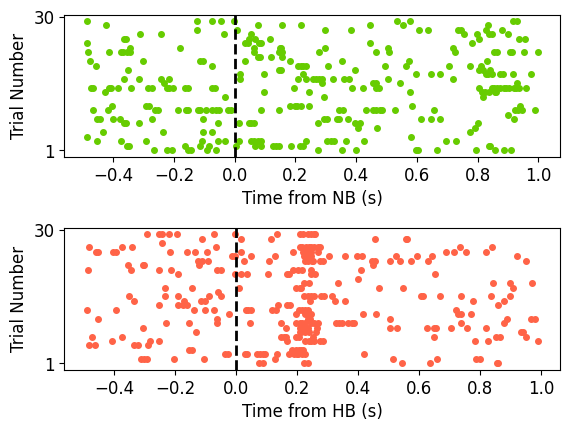

In [12]:
NB_peth = nap.compute_perievent(spikes[0], NB, minmax = (-0.5,1)) #Compute PETH of unit aligned to NB, for -0.5 to 1s windows
HB_peth = nap.compute_perievent(spikes[0], HB, minmax = (-0.5,1)) #Compute PETH of unit aligned to HB, for -0.5 to 1s windows

#Let's plot the PETH
plt.figure()
plt.rc('font', size = 12) 
plt.subplot(211) #Plot the figures in 2 rows 
for i,n in enumerate(NB_peth):
     plt.plot(NB_peth[n].as_units('s').fillna(i), 'o', color = [102/255,204/255,0/255], markersize = 4) #Plot PETH
plt.axvline(0, linewidth = 2, color = 'k', linestyle = '--') #Plot a line at t = 0 
plt.yticks([0,30]) #Set ticks on Y-axis
plt.gca().set_yticklabels(['1','30']) #Label the ticks
plt.xlabel('Time from NB (s)') #Time from boundary in seconds, on X-axis
plt.ylabel('Trial Number') #Trial number on Y-axis

plt.subplot(212)
for i,n in enumerate(HB_peth):
     plt.plot(HB_peth[n].as_units('s').fillna(i), 'o', color = [255/255,99/255,71/255], markersize = 4) #Plot PETH
plt.axvline(0, linewidth = 2, color = 'k', linestyle = '--') #Plot a line at t = 0 
plt.yticks([0,30]) #Set ticks on Y-axis
plt.gca().set_yticklabels(['1','30']) #Label the ticks
plt.xlabel('Time from HB (s)') #Time from boundary in seconds, on X-axis
plt.ylabel('Trial Number') #Trial number on Y-axis
plt.subplots_adjust(wspace = 0.2, hspace = 0.5, top = 0.85) 



Awesome! From the PETH, we can see that this neuron fires after boundary onset in HB trials. This is an example of what the authors describe  <a href="https://www.nature.com/articles/s41593-022-01020-w" target="_blank">here</a> as a *boundary cell*.

*** 

### PETH of firing rate for NB and HB trials

Now that we have the PETH of spiking, we can go one step further. We will plot the mean firing rate of this cell aligned to the boundary for each trial type. Doing this in Pynapple is very simple!

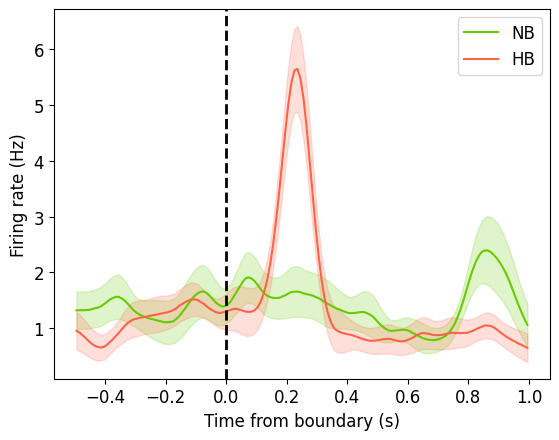

In [13]:
bin_size = 0.2 #200ms bin size
step_size = 0.01 #10ms step size, to make overlapping bins 
winsize = int(bin_size/step_size) #Window size 

#Use Pynapple to compute binned spike counts
counts_NB = NB_peth.count(step_size) #Spike counts binned in 10ms steps, for NB trials
counts_HB = HB_peth.count(step_size) #Spike counts binned in 10ms steps, for HB trials

#Smoothing binned spike counts using a window of size 20, for both trial types
counts_NB = counts_NB.as_dataframe().rolling(winsize, win_type = 'gaussian', min_periods = 1, center = True, axis = 0).mean(std = 0.2 * winsize) 
counts_HB = counts_HB.as_dataframe().rolling(winsize, win_type = 'gaussian', min_periods = 1, center = True, axis = 0).mean(std = 0.2 * winsize) 

#Compute firing rate for both trial types
fr_NB = counts_NB * winsize
fr_HB = counts_HB * winsize

#Compute the mean firing rate for both trial types 
meanfr_NB = fr_NB.mean(axis = 1)
meanfr_HB = fr_HB.mean(axis = 1)

#Compute standard error of mean (SEM) of the firing rate for both trial types
error_NB = fr_NB.sem(axis = 1)
error_HB = fr_HB.sem(axis = 1)

#Plot the mean +/- SEM of firing rate for both trial types
plt.figure()
plt.plot(meanfr_NB , color = [102/255, 204/255, 0/255], label = 'NB') #Plot mean firing rate for NB trials
#Plot SEM for NB trials
plt.fill_between(meanfr_NB.index.values, meanfr_NB.values - error_NB, meanfr_NB.values + error_NB, color = [102/255, 204/255, 0/255], alpha = 0.2)
plt.plot(meanfr_HB , color = [255/255, 99/255, 71/255], label = 'HB')  #Plot mean firing rate for HB trials
#Plot SEM for NB trials
plt.fill_between(meanfr_HB.index.values, meanfr_HB.values - error_HB, meanfr_HB.values + error_HB, color = [255/255, 99/255, 71/255], alpha = 0.2)
plt.axvline(0, linewidth = 2, color = 'k', linestyle = '--') #Plot a line at t = 0 
plt.xlabel('Time from boundary (s)') #Time from boundary in seconds, on X-axis
plt.ylabel('Firing rate (Hz)') #Firing rate in Hz on Y-axis
plt.legend(loc = 'upper right')

This plot verifies what we visualized in the PETH rasters above, that this cell responds to a hard boundary. Hence, it is a *boundary cell*. To learn more about these cells, please check out the original study <a href="https://www.nature.com/articles/s41593-022-01020-w" target="_blank">here</a>. 

I hope this tutorial was helpful. If you have any questions, comments or suggestions, please feel free to reach out to the Pynapple Team!